In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.1.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached numpy-2.1.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.0 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install scipy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pyarrow

  Using cached pyarrow-17.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
Using cached pyarrow-17.0.0-cp312-cp312-manylinux_2_28_x86_64.whl (39.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pyspark

  Using cached pyspark-3.5.3-py2.py3-none-any.whl
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl.metadata (1.5 kB)
Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install matplotlib.pyplot

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install catboost

  Using cached catboost-1.2.7-cp312-cp312-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached contourpy-1.3.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.

In [2]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, roc_curve, roc_auc_score
import pyarrow.parquet as pa
import pyspark as ps
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import arrays_zip, explode, col
from tqdm import tqdm
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"

In [4]:
spark = SparkSession.builder.config("spark.driver.memory", "4g").config("spark.executor.memory", "4g").getOrCreate()
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "false")

24/10/22 13:03:53 WARN Utils: Your hostname, compute-vm-8-16-22-hdd-1729503505354 resolves to a loopback address: 127.0.1.1; using 10.130.0.7 instead (on interface eth0)
24/10/22 13:03:53 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/22 13:03:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/10/22 13:03:54 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [5]:
spark

24/10/22 13:04:06 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [6]:
df = spark.read.parquet('train.parquet')

In [7]:
df.show()

+-----+--------------------+--------------------+-----+
|   id|               dates|              values|label|
+-----+--------------------+--------------------+-----+
|19114|[2016-01-01, 2016...|[-1.86, 0.79, 1.4...|  0.0|
|22769|[2016-05-01, 2016...|[-1.04, -3.48, 0....|  1.0|
|76935|[2017-03-01, 2017...|[0.28, 0.63, 0.06...|  0.0|
|66297|[2016-01-01, 2016...|[-0.33, 0.58, 1.1...|  0.0|
| 2191|[2016-01-01, 2016...|[1.31, 0.5, -0.54...|  0.0|
|59504|[2016-03-01, 2016...|[0.08, 0.88, 1.46...|  0.0|
|49554|[2016-04-01, 2016...|[1.05, -0.28, 1.0...|  0.0|
|58344|[2016-12-01, 2017...|[-0.36, -0.45, -0...|  0.0|
|87449|[2016-01-01, 2016...|[2.92, 4.11, 3.39...|  1.0|
|43415|[2016-02-01, 2016...|[-0.86, -0.05, -0...|  1.0|
|76676|[2016-01-01, 2016...|[2.24, 0.46, 1.41...|  0.0|
| 4321|[2016-01-01, 2016...|[1.1, 1.73, 2.04,...|  0.0|
|17921|[2016-01-01, 2016...|[1.06, 1.04, 0.62...|  0.0|
|60176|[2016-01-01, 2016...|[1.41, -0.62, -1....|  0.0|
|61864|[2016-01-01, 2016...|[0.24, 0.37, 0.97...

In [8]:
df.printSchema

<bound method DataFrame.printSchema of DataFrame[id: bigint, dates: array<date>, values: array<double>, label: double]>

In [9]:
df.pandas_api().isna().mean()

id        0.0
dates     0.0
values    0.0
label     0.0
dtype: float64

In [10]:
df_zip = df.withColumn("zip_date_val", arrays_zip("dates", "values"))

In [11]:
df_exp = df_zip.withColumn("explod_date_val", explode("zip_date_val"))

In [12]:
df_new = df_exp.select(
    col("id"),
    col("explod_date_val.dates").alias("date"),
    col("explod_date_val.values").alias("value"),
    col("label")
)

In [13]:
df.printSchema

<bound method DataFrame.printSchema of DataFrame[id: bigint, dates: array<date>, values: array<double>, label: double]>

In [14]:
df_new = df_new.toPandas()

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5155412 entries, 0 to 5155411
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   date    object 
 2   value   float64
 3   label   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 157.3+ MB


In [16]:
df_new.isna().sum()

id          0
date        0
value    4582
label       0
dtype: int64

In [17]:
df_new = df_new.dropna()

In [18]:
df_new.isna().sum()

id       0
date     0
value    0
label    0
dtype: int64

In [19]:
df_new['date'] = pd.to_datetime(df_new['date'])
df_new['date'] = df_new['date'].astype('int64') // 10**9

In [20]:
df_new['date'] = df_new['date'].values.astype("float64")
df_new['value'] = df_new['value'].values.astype("float64")

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5150830 entries, 0 to 5155411
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   date    float64
 2   value   float64
 3   label   float64
dtypes: float64(3), int64(1)
memory usage: 196.5 MB


In [22]:
x = df_new.drop(['label'], axis= 1)
y = df_new['label']
x.shape
y.shape

(5150830, 3)

(5150830,)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 12345)

In [53]:
x_end_train, x_end_test, y_end_train, y_end_test = train_test_split(x_train, y_train, test_size= 0.3, random_state= 12345)

In [24]:
# params_rand = {
#     'iterations' : [int(x) for x in np.linspace(start = 200, stop = 400, num = 20)],
#     'depth' : [int(x) for x in np.linspace(start = 5, stop = 15, num = 5)],
#     'learning_rate' : [x for x in np.linspace(start = 0.1, stop = 0.3, num = 5)],
#     'l2_leaf_reg' : [int(x) for x in np.linspace(start = 2, stop = 30, num = 7)]
# }

In [25]:
# c_model = CatBoostClassifier(custom_metric='AUC')
# rand_search = RandomizedSearchCV(c_model, params_rand, error_score='raise', cv= 5, verbose= 2)

In [26]:
rand_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6350289	total: 552ms	remaining: 3m 4s
1:	learn: 0.6075002	total: 930ms	remaining: 2m 35s
2:	learn: 0.5944253	total: 1.32s	remaining: 2m 26s
3:	learn: 0.5881189	total: 1.7s	remaining: 2m 20s
4:	learn: 0.5850313	total: 2.09s	remaining: 2m 18s
5:	learn: 0.5835156	total: 2.47s	remaining: 2m 16s
6:	learn: 0.5827174	total: 2.92s	remaining: 2m 17s
7:	learn: 0.5823339	total: 3.29s	remaining: 2m 14s
8:	learn: 0.5821237	total: 3.71s	remaining: 2m 14s
9:	learn: 0.5819925	total: 4.09s	remaining: 2m 13s
10:	learn: 0.5819081	total: 4.47s	remaining: 2m 12s
11:	learn: 0.5818421	total: 4.86s	remaining: 2m 11s
12:	learn: 0.5817854	total: 5.3s	remaining: 2m 11s
13:	learn: 0.5817297	total: 5.68s	remaining: 2m 10s
14:	learn: 0.5816654	total: 6.11s	remaining: 2m 10s
15:	learn: 0.5815897	total: 6.48s	remaining: 2m 9s
16:	learn: 0.5815098	total: 6.89s	remaining: 2m 9s
17:	learn: 0.5814691	total: 7.34s	remaining: 2m 9s
18:	learn: 0.581415

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=<catboost.core.CatBoostClassifier object at 0x717c6da5cd40>,
                   param_distributions={'depth': [5, 7, 10, 12, 15],
                                        'iterations': [200, 210, 221, 231, 242,
                                                       252, 263, 273, 284, 294,
                                                       305, 315, 326, 336, 347,
                                                       357, 368, 378, 389,
                                                       400],
                                        'l2_leaf_reg': [2, 6, 11, 16, 20, 25,
                                                        30],
                                        'learning_rate': [0.1, 0.15, 0.2, 0.25,
                                                          0.3]},
                   verbose=2)

In [27]:
rand_search.best_params_

{'learning_rate': 0.3, 'l2_leaf_reg': 25, 'iterations': 378, 'depth': 15}

In [25]:
end_model = CatBoostClassifier(iterations= 378, depth= 15, learning_rate= 0.3, l2_leaf_reg= 25, custom_metric='AUC')

In [26]:
end_model.fit(x_train, y_train)

0:	learn: 0.6348279	total: 819ms	remaining: 5m 8s
1:	learn: 0.6075080	total: 1.41s	remaining: 4m 25s
2:	learn: 0.5943655	total: 1.99s	remaining: 4m 8s
3:	learn: 0.5881181	total: 2.67s	remaining: 4m 9s
4:	learn: 0.5850281	total: 3.23s	remaining: 4m
5:	learn: 0.5835395	total: 3.93s	remaining: 4m 3s
6:	learn: 0.5827989	total: 4.6s	remaining: 4m 3s
7:	learn: 0.5823798	total: 5.32s	remaining: 4m 5s
8:	learn: 0.5821053	total: 6.03s	remaining: 4m 7s
9:	learn: 0.5819537	total: 6.75s	remaining: 4m 8s
10:	learn: 0.5818540	total: 7.46s	remaining: 4m 8s
11:	learn: 0.5817541	total: 8.17s	remaining: 4m 9s
12:	learn: 0.5816885	total: 8.86s	remaining: 4m 8s
13:	learn: 0.5816237	total: 9.56s	remaining: 4m 8s
14:	learn: 0.5815542	total: 10.3s	remaining: 4m 8s
15:	learn: 0.5815074	total: 11s	remaining: 4m 7s
16:	learn: 0.5814484	total: 11.7s	remaining: 4m 8s
17:	learn: 0.5813606	total: 12.4s	remaining: 4m 7s
18:	learn: 0.5813052	total: 13.1s	remaining: 4m 7s
19:	learn: 0.5812517	total: 13.8s	remaining: 4

In [61]:
predictions_y = end_model.predict_proba(x_end_test)[:, 1]

In [35]:
pr = predictions_y[:, 1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
# catboost_pool = Pool(x_end_train, y_en)

In [2]:
eval_pool = Pool(x_end_test, y_end_test)
curve = get_roc_curve(end_model, eval_pool)
(fpr, tpr, thresholds)=curve
roc_auc=auc(fpr, tpr)

NameError: name 'Pool' is not defined

<Figure size 1600x800 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

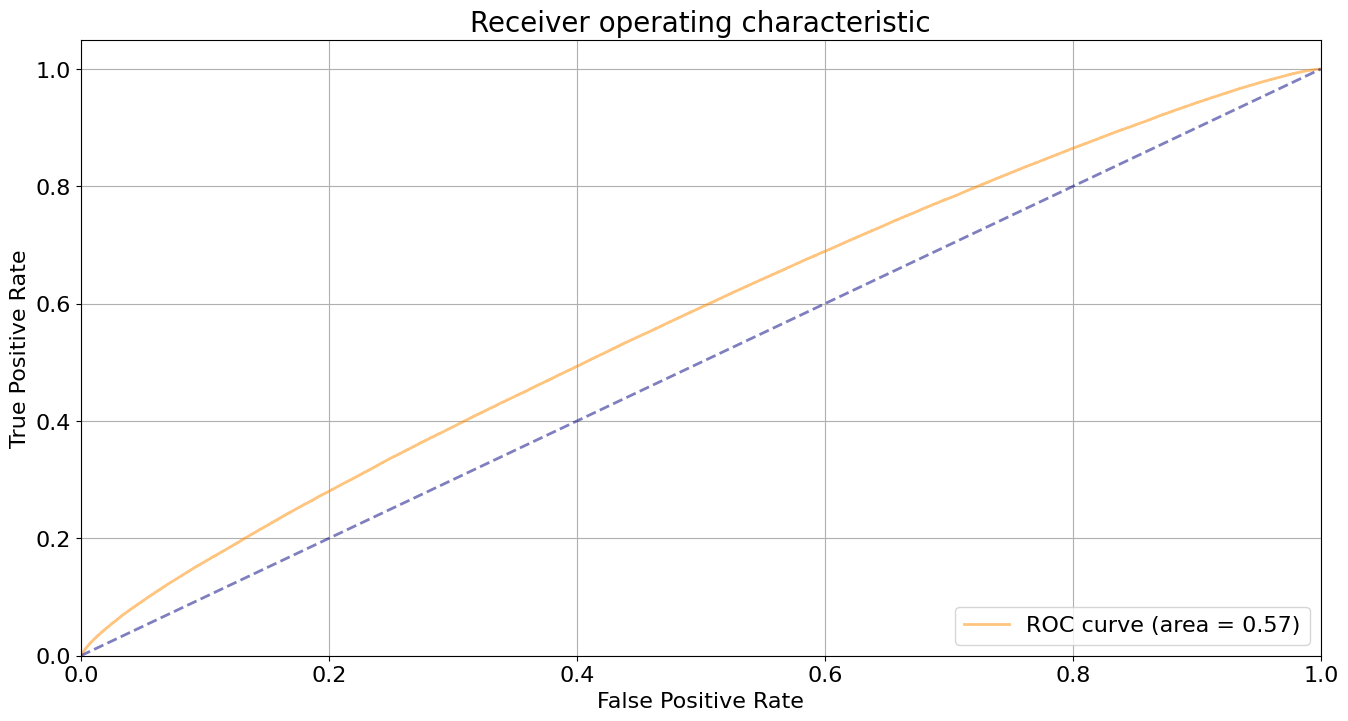

In [48]:
plt.figure(figsize=(16, 8))
lw=2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [50]:
f_model = RandomForestClassifier(max_depth= 14, min_samples_leaf= 28, min_samples_split= 23, n_estimators= 290)

In [51]:
f_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=23,
                       n_estimators=290)

In [56]:
predictions_y = f_model.predict(x_end_test)[:, 1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [57]:
predictions_y

array([0., 0., 0., ..., 0., 0., 0.])

In [58]:
fpr, tpr, thresholds = roc_curve(y_end_test, predictions_y, pos_label=1)

In [59]:
roc_auc = roc_auc_score(y_end_test, predictions_y) 
roc_auc

0.5024252800718431

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

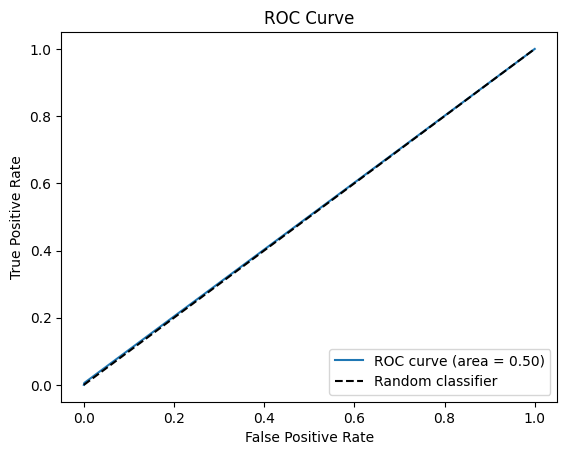

In [60]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()